# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 5__

__Nombres de los estudiantes: Gema Blanco Núñez y Diego Alejandro Rodríguez Pereira__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
import pandas as pd

#Crear dataframe
df = pd.read_csv('airbnb.csv')

#Indicar variables categóricas

df['instant_bookable'] = df['instant_bookable'].astype('category')
df['entire_home'] = df['entire_home'].astype('category')
df['private_room'] = df['private_room'].astype('category')
df['shared_room'] = df['shared_room'].astype('category')


#Elimnar las filas que tengan datos incompletos
df = df.dropna()
df = df.reset_index(drop=True)

df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [2]:
# Mostrar datos estadísticos de cada variable
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,440.000000


### Análisis de los datos

El **conjunto de datos del fichero cargado nos muestra las características de los alojamientos** de Airbnb en Ámsterdan. El **significado de las variables** es el siguiente:

- **Accommodates:** indica el número de huéspedes permitidos
- **Bathrooms:** indica el número de baños en el alojamiento
- **Bedrooms:** indica el número de habitaciones en el alojamiento
- **Guests included:** Número de invitados que se permiten
- **Host Listings Count:** Número de propiedades del arrendador/host
- **Latitude/Longitud:** coordenadas del alojamiento
- **Minimun Nights:** número mínimo de noches para alquilar el alojamiento
- **Number of reviews:** número de opiniones sobre el alojamiento
- **Distance centre:** distancia del alojamiento al centro de la ciudad
- **Instant bookable (0-1):** indica si se puede reservar de forma instantánea o no
- **Entire home (0-1):** indica si el tipo de alojamiento es una casa entera o no
- **Private room (0-1):** indica si el tipo de alojamiento es una habitación privada o no
- **Shared room (0-1):** indica si el tipo de alojamiento es una habitación compartida o no
- **Price:** precio del alojamiento por noche

Las variables cuyo valor están en el rango 0-1 (entire home, private room, shared room) son variables categóricas. La **distribución de precios** se distribuye en un rango de 19eur hasta 440eur por noche, siendo la media de 130eur por noche, lo cual indica que hay un mayor número de alojamientos con precios bajos que con precios elevados. 

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [3]:
# Correlación de Pearson
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
correl = df.corr(method='pearson')
correl['price']

# para mostrar sólo las que superen cierto umbral de correlación
#correl[abs(correl['price']) > 0.2]['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
price                  1.000000
Name: price, dtype: float64

Las variables que están relacionadas con el precio por un valor de correlación de al menos 0.2 son:

- **Price-Accommodates:** este par de variables se relaciona de forma directa ya que al aumentar el número de huéspedes por alojamiento también aumenta el precio.
- **Price-Bathrooms:** este par de variables también se relaciona de forma directa puesto que un mayor número de baños en un alojamiento incrementa el valor del mismo.
- **Price-Bedrooms:** estas variables también se relacionan de forma directa por la misma razón que en el caso anterior.
- **Price-Guests Included:** estas variables se relacionan de forma directa, ya que entre más invitados más caro.
- **Price-Distance Centre:** en este caso las variables se relacionan de forma inversa ya que al aumentar la distancia del alojamiento al centro de la ciudad disminuye el precio. El hecho de que un alojamiento sea céntrico incrementa su valor.

In [4]:
# Crear nuevo dataframe
df2 = df.copy()
df2 = df2.drop(['host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews'],axis=1)
df2

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.777881,0,1,0,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

### Normalizar los datos

Hemos decidido escalar los datos ya que el rango de las variables es distinto y para entrenar redes neuronales es conveniente normalizar los datos. Ya que las variables utilizadas en este problema no siguen una distribución normal vamos a utilizar MinMaxScaler.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Array con la descripción de los pisos
data = df2.drop(['price'],axis=1).to_numpy()

# Array con el precio
target = df2['price'].to_numpy()

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(data)
airbnb_scaled=scaler_x.transform(data)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(target.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(target.reshape(-1, 1))


## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [6]:
RANDOM_STATE=333

### Red neuronal con capa oculta de 200 neuronas

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, airbnb_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012767813409624611,
  -0.012187513920472726,
  -0.01196984421981012,
  -0.011978218820560122,
  -0.011946281279360574,
  -0.011980980452872046],
 [0.0004536971487143054,
  0.00041043923123423013,
  0.0004445046668544497,
  0.0004340260787436643,
  0.00044275090460603234,
  0.00044896384126203733])

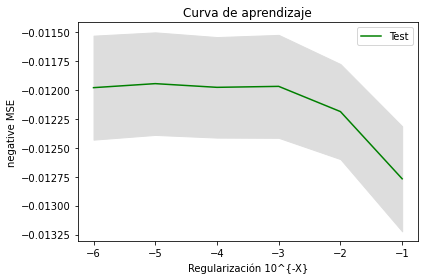

In [8]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar que este parámetro empieza a empeorar a partir del valor $\alpha=10^{-3}$. Parece que el mejor valor (el más cercano a cero) es con $\alpha=10^{-4}$.

### Red neuronal con dos capas ocultas cada una de 100 neuronas

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, airbnb_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.01264122425793857,
  -0.01196887370882033,
  -0.011885545491750827,
  -0.011821927564002372,
  -0.011834216243473092,
  -0.01182102144674312],
 [0.00041249510042294456,
  0.0004364708399936215,
  0.0004642047842503849,
  0.00042642326375980327,
  0.00041437519703011545,
  0.0004231461058693032])

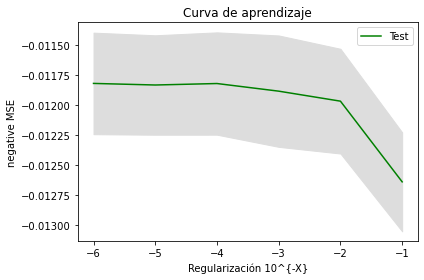

In [10]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar que este parámetro empieza a empeorar a partir del valor $\alpha=10^{-2}$. Parece que el mejor valor (el más cercano a cero) es con $\alpha=10^{-5}$.

### Análisis de las redes neuronales

_¿Alguna de las dos redes domina a la otra?_

La de **dos capas de 100 neuronas** es la que domina sobre la de **una sola capa de 200 neuronas**, ya que obtiene mejores resultados y valor de MSE es mayor (más cercano a cero).

_¿Por qué crees que se producen las diferencias?_

Estas diferencias se producen debido a que en la de **una sola capa de 200 neuronas**, la capa de entrada y la capa de salida es la misma. Mientras que en la de **dos capas de 100 neuronas** la capa de entrada y de salida son distintas por tanto las salida se ajusta más y mejor. Lo que nos lleva a concluir que es mejor aumentar el número de capas que aumentar el número de neuronas por capa. Ya que de esta manera podemos conseguir una mejor adapatación de los pesos asignados a las variables, y por tanto la salida sea más ajustada.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [11]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.00001
mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, airbnb_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1, 1))

In [12]:
errors = np.abs(target - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df2['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 56.91103689025734
Desviación típica: 52.509930830721245
Error medio en %: 43.76079758666674


### ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

**Error Medio:** 56.9eur

El modelo es bastante malo debido a que el error en euros es bastante significativo. Es un cifra importante, el error fuese aceptable si esta cifra fuese unos pocos euros o céntimos. 

Podríamos mejorar nuestro modelo aumentado el número de capas y ajustando el resto de parámetros, hasta conseguir la configuración más óptima.

### Distribución del error en euros

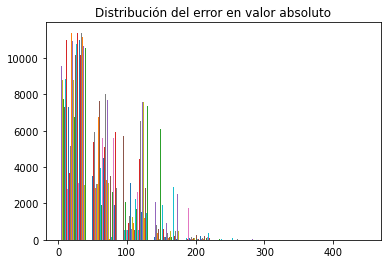

In [13]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

### Diagrama de dispersión de la predicción frente al valor real

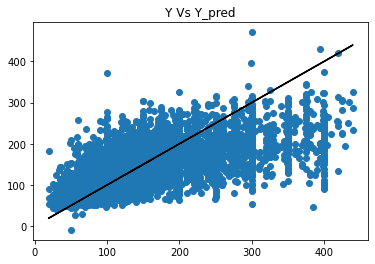

In [15]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(target, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(target, target, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

### ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

En primer lugar notamos que en los datos tenemos menos datos de establecimientos con precio alto que de precio bajo y medio, ya que la media de los precios se encuentra en los 139eur mientras que el establecimiento más caro se situa en los 440eur. Esto hace que a nuestro modelo le dificulte más ajustarse al precio de los establecimientos más caros. 

A su vez creemos que lo que hace que nuestro modelo le dificulte predecir precio de establecimientos caros es debido a que no tenemos en consideración muchas variables de las que afectan especialmente a estos. Como lo podría ser la calidad de los muebles, el tamaño de estos muebles, de los servicios que presta el lugar (como sería dejar la nevera llena, dejar una cata de vinos, dejar preparado el baño con suministros, recomendaciones a lugares turísticos, o si vienen incluidos con algún guía). A diferencia de los precios bajos y medio que le es suficiente con las variables básicas. Pero aún así se están obviando muchos detalles, como si el baño es simple, o de si es un jacuzzi de lujo, o el tamaño de las habitaciones. No es lo mismo 3 habitaciones pequeñas, que 3 habitaciones grandes y con todo tipo de muebles. 